#오픈 API로 부동산 데이터 크롤링하기

**과정**

1. API 제공하는 웹 사이트에 접속
2. 회원 가입 후 API 사용 권한 신청
3. 승인되면 API를 이용해서 파이썬으로 부동산 데이터 요청 및 확인

**API란?**

- 식당으로 비유
- 사용자(손님) , API(종업원), 서버(주방장)
- API를 통해서 데이터를 전달 받음

##API 사용하기

In [2]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

# endpoint는 사용자가 최종적으로 도달한 웹의 경로
endpoint = "http://openapi.reb.or.kr/OpenAPI_ToolInstallPackage/service/rest/RealEstateTradingSvc/getRealEstateTradingCount"

# 인증키 변수
serviceKey = "0OhBU7ZCGIobDVKDeBJDpmDRqK3IRNF6jlf%2FJB2diFAf%2FfR2czYO9A4UTGcsOwppV6W2HVUeho%2FFPwXoL6DwqA%3D%3D"
# 실제 인증키 : zmekiZmDRmDEuqY1Q3HE%2B4csRhVzKSY7v9YTtoNvYIUND4d2LF84OaIhRLvCSWXqu3trUsgTP95BkgGX8wz2fg%3D%3D

# API 요청변수
startmonth = "201301"
endmonth = "201312"
region = "11000"
tradingtype = "01"

In [3]:
url = endpoint + "?" + "serviceKey=" + serviceKey + "&" + "startmonth=" + startmonth + "&" + "endmonth=" + endmonth + "&" + "region=" + region + "&" + "tradingtype=" + tradingtype 

In [4]:
print(url)

http://openapi.reb.or.kr/OpenAPI_ToolInstallPackage/service/rest/RealEstateTradingSvc/getRealEstateTradingCount?serviceKey=0OhBU7ZCGIobDVKDeBJDpmDRqK3IRNF6jlf%2FJB2diFAf%2FfR2czYO9A4UTGcsOwppV6W2HVUeho%2FFPwXoL6DwqA%3D%3D&startmonth=201301&endmonth=201312&region=11000&tradingtype=01


In [5]:
html = urlopen(url)
bs_obj = BeautifulSoup(html, "html.parser")

In [6]:
print(bs_obj)

<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultcode>00</resultcode><resultmsg>NORMAL SERVICE.</resultmsg></header><body><item><regioncd>11000</regioncd><regionnm>서울</regionnm><rsrow>201301,9917|201302,10028|201303,15322|201304,17911|201305,19902|201306,25636|201307,13051|201308,12902|201309,14378|201310,20262|201311,19293|201312,21605</rsrow></item></body></response>


#pandas로 한눈에 알아보는 데이터 만들기

**과정**

1. API제공 웹 사이트 접속
2. 제공받은 API를 이용해서 파이썬으로 데이터를 불러온다
3. 불러온 데이터에서 원하는 데이터 추출
4. 데이터프레임 형태로 저장
5. 데이터 시각화

In [7]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

# endpoint는 사용자가 최종적으로 도달한 웹의 경로
endpoint = "http://openapi.reb.or.kr/OpenAPI_ToolInstallPackage/service/rest/RealEstateTradingSvc/getRealEstateTradingCount"

# 인증키 변수
serviceKey = "0OhBU7ZCGIobDVKDeBJDpmDRqK3IRNF6jlf%2FJB2diFAf%2FfR2czYO9A4UTGcsOwppV6W2HVUeho%2FFPwXoL6DwqA%3D%3D"
# 실제 인증키 : zmekiZmDRmDEuqY1Q3HE%2B4csRhVzKSY7v9YTtoNvYIUND4d2LF84OaIhRLvCSWXqu3trUsgTP95BkgGX8wz2fg%3D%3D

# API 요청변수
startmonth = "201901"    # 원하는 날짜
endmonth = "202012"
region = "11110"    # '종로구'에 대한 지역코드 (참조 문서에 지역코드 있음)
tradingtype = "05"    # 거래유형 코드

In [8]:
url = endpoint + "?" + "serviceKey=" + serviceKey + "&" + "startmonth=" + startmonth + "&" + "endmonth=" + endmonth + "&" + "region=" + region + "&" + "tradingtype=" + tradingtype

html = urlopen(url)
bs_obj = BeautifulSoup(html, "html.parser")

In [9]:
# 지금은 그냥 데이터들의 모음이고, 한 눈에 들어오지는 않는다.

print(bs_obj)

<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultcode>00</resultcode><resultmsg>NORMAL SERVICE.</resultmsg></header><body><item><regioncd>11110</regioncd><regionnm>종로구</regionnm><rsrow>201901,51|201902,56|201903,78|201904,64|201905,43|201906,55|201907,75|201908,83|201909,63|201910,79|201911,115|201912,204|202001,194|202002,91|202003,104|202004,55|202005,68|202006,106|202007,173|202008,80|202009,57|202010,51|202011,100|202012,102</rsrow></item></body></response>


###크롤링 데이터를 데이터 프레임으로

보기 쉽도록!!

데이터를 리스트로 만들기

In [11]:
# regionnm태그에 있는 지역정보 추출하기

regi = bs_obj.find("regionnm").text
print(regi)

종로구


In [13]:
# rsrow 태그에 있는 기간 및 건수 데이터 추출
# | 로 나누어져 있는 형태  ->  기간 , 건수 | 기간, 건수 | ...

trade = bs_obj.find("rsrow").text
print(trade)

201901,51|201902,56|201903,78|201904,64|201905,43|201906,55|201907,75|201908,83|201909,63|201910,79|201911,115|201912,204|202001,194|202002,91|202003,104|202004,55|202005,68|202006,106|202007,173|202008,80|202009,57|202010,51|202011,100|202012,102


In [14]:
# | 기준 분해

data = trade.split('|')
print(data)

['201901,51', '201902,56', '201903,78', '201904,64', '201905,43', '201906,55', '201907,75', '201908,83', '201909,63', '201910,79', '201911,115', '201912,204', '202001,194', '202002,91', '202003,104', '202004,55', '202005,68', '202006,106', '202007,173', '202008,80', '202009,57', '202010,51', '202011,100', '202012,102']


In [15]:
# , 기준 분해

value = data[0].split(",")
print(value)

['201901', '51']


리스트 데이터를 데이터 프레임으로

In [56]:
import pandas as pd

col = ['지역', '날짜', '거래 건수']

df = pd.DataFrame(columns=col)

In [57]:
print(df)

Empty DataFrame
Columns: [지역, 날짜, 거래 건수]
Index: []


In [59]:
# 반복문으로 df에 추가
# concat을 사용해서 다시 해보자..

n = len(data)
for i in range(n):
    value = data[i].split(',')
    row = [regi, value[0], int(value[1])]
    df_row = pd.Series(row, index=col)    # 각 row를 Series 객체로 만들고
    df = df.append(df_row, ignore_index=True)    # append함수는 곧 없어진다..

print(df)

C:\Users\liver\AppData\Local\Temp\ipykernel_25944\3342791734.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_row, ignore_index=True)    # append함수는 곧 없어진다..
C:\Users\liver\AppData\Local\Temp\ipykernel_25944\3342791734.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_row, ignore_index=True)    # append함수는 곧 없어진다..
C:\Users\liver\AppData\Local\Temp\ipykernel_25944\3342791734.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_row, ignore_index=True)    # append함수는 곧 없어진다..
C:\Users\liver\AppData\Local\Temp\ipykernel_25944\3342791734.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

     지역      날짜 거래 건수
0   종로구  201901    51
1   종로구  201902    56
2   종로구  201903    78
3   종로구  201904    64
4   종로구  201905    43
5   종로구  201906    55
6   종로구  201907    75
7   종로구  201908    83
8   종로구  201909    63
9   종로구  201910    79
10  종로구  201911   115
11  종로구  201912   204
12  종로구  202001   194
13  종로구  202002    91
14  종로구  202003   104
15  종로구  202004    55
16  종로구  202005    68
17  종로구  202006   106
18  종로구  202007   173
19  종로구  202008    80
20  종로구  202009    57
21  종로구  202010    51
22  종로구  202011   100
23  종로구  202012   102


C:\Users\liver\AppData\Local\Temp\ipykernel_25944\3342791734.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_row, ignore_index=True)    # append함수는 곧 없어진다..
C:\Users\liver\AppData\Local\Temp\ipykernel_25944\3342791734.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_row, ignore_index=True)    # append함수는 곧 없어진다..


#matplotlib으로 데이터 시각화

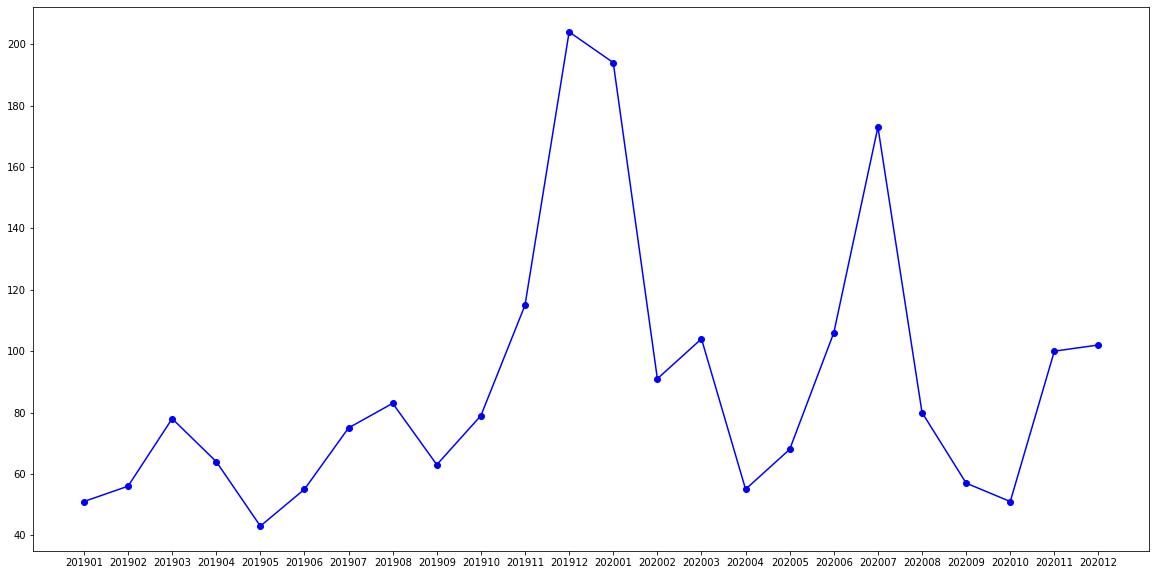

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))   #fig 객체 생성
plt.plot(df['날짜'], df['거래 건수'], color='b', marker='o')
plt.show()

#pandas와 matplotlib을 활용한 심화 실습

In [61]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
# endpoint는 사용자가 최종적으로 도달한 웹의 경로
endpoint = "http://openapi.reb.or.kr/OpenAPI_ToolInstallPackage/service/rest/RealEstateTradingSvc/getRealEstateTradingCount"

# 인증키 변수
serviceKey = "0OhBU7ZCGIobDVKDeBJDpmDRqK3IRNF6jlf%2FJB2diFAf%2FfR2czYO9A4UTGcsOwppV6W2HVUeho%2FFPwXoL6DwqA%3D%3D"
# 실제 인증키 : zmekiZmDRmDEuqY1Q3HE%2B4csRhVzKSY7v9YTtoNvYIUND4d2LF84OaIhRLvCSWXqu3trUsgTP95BkgGX8wz2fg%3D%3D

# API 요청변수
startmonth = "201901"    # 원하는 날짜
endmonth = "202012"
region = ["11110", "11215", "11620"]    # 종로, 광진, 관악구의 지역코드
tradingtype = "05"    # 거래유형 코드

In [63]:
m = len(region)
df = pd.DataFrame(columns = col)

In [64]:
for j in range(m):
    url = endpoint + "?" +"serviceKey=" + serviceKey + "&" + "startmonth=" + startmonth + "&" +\
    "endmonth=" + endmonth + "&" + "region=" + region[j] + "&" + "tradingtype=" + tradingtype

    html = urlopen(url)
    bs_obj = BeautifulSoup(html, "html.parser")

    regi = bs_obj.find("regionnm").text
    trade = bs_obj.find("rsrow").text
    data = trade.split('|')
    
    n = len(data)
    for i in range(n):
        value = data[i].split(',')
        row = [regi, value[0], int(value[1])]
        df_row = pd.Series(row, index=col)    # 각 row를 Series 객체로 만들고
        df = df.append(df_row, ignore_index=True)    # append함수는 곧 없어진다..

print(df)

C:\Users\liver\AppData\Local\Temp\ipykernel_25944\217307003.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_row, ignore_index=True)    # append함수는 곧 없어진다..
C:\Users\liver\AppData\Local\Temp\ipykernel_25944\217307003.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_row, ignore_index=True)    # append함수는 곧 없어진다..
C:\Users\liver\AppData\Local\Temp\ipykernel_25944\217307003.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_row, ignore_index=True)    # append함수는 곧 없어진다..
C:\Users\liver\AppData\Local\Temp\ipykernel_25944\217307003.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

C:\Users\liver\AppData\Local\Temp\ipykernel_25944\217307003.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_row, ignore_index=True)    # append함수는 곧 없어진다..
C:\Users\liver\AppData\Local\Temp\ipykernel_25944\217307003.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_row, ignore_index=True)    # append함수는 곧 없어진다..
C:\Users\liver\AppData\Local\Temp\ipykernel_25944\217307003.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_row, ignore_index=True)    # append함수는 곧 없어진다..
C:\Users\liver\AppData\Local\Temp\ipykernel_25944\217307003.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

     지역      날짜 거래 건수
0   종로구  201901    51
1   종로구  201902    56
2   종로구  201903    78
3   종로구  201904    64
4   종로구  201905    43
..  ...     ...   ...
67  관악구  202008   275
68  관악구  202009   404
69  관악구  202010   227
70  관악구  202011   195
71  관악구  202012   368

[72 rows x 3 columns]


C:\Users\liver\AppData\Local\Temp\ipykernel_25944\217307003.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_row, ignore_index=True)    # append함수는 곧 없어진다..


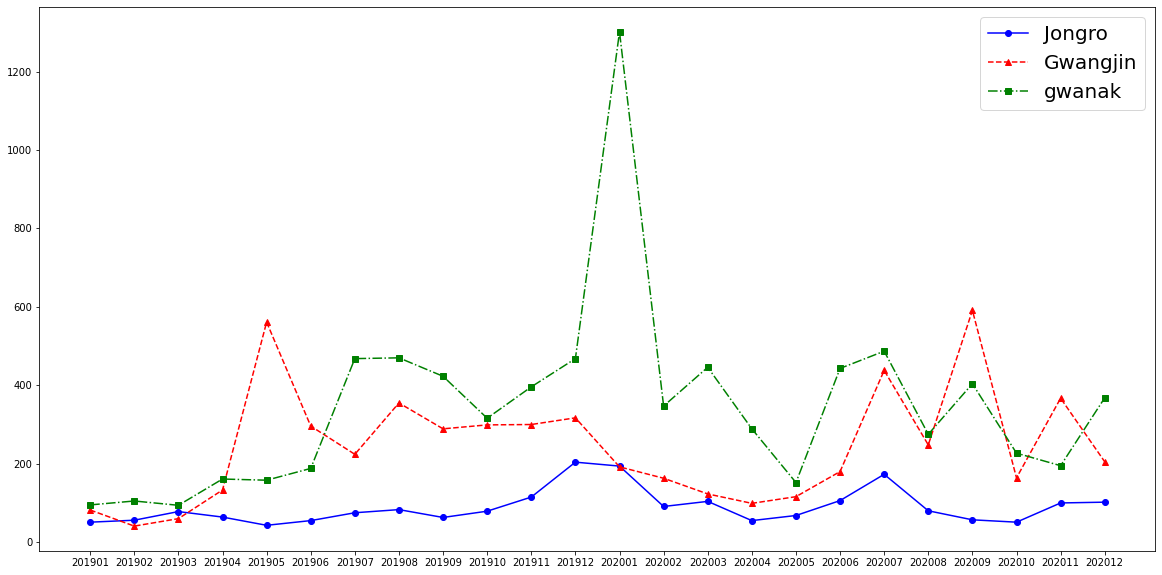

In [67]:
# 지역별 따로 시각화

df1 = df[df['지역'] == '종로구']
df2 = df[df['지역'] == '광진구']
df3 = df[df['지역'] == '관악구']

plt.figure(figsize=(20, 10))   #fig 객체 생성
plt.plot(df1['날짜'], df1['거래 건수'], color='b', marker='o', linestyle='-', label='Jongro')
plt.plot(df2['날짜'], df2['거래 건수'], color='r', marker='^', linestyle='--', label='Gwangjin')
plt.plot(df3['날짜'], df3['거래 건수'], color='g', marker='s', linestyle='-.', label='gwanak')
plt.legend(fontsize=20)
plt.show()

#파이썬으로 CSV 파일 다루기

In [68]:
# df를 csv파일로 바꾸기

print(df)

     지역      날짜 거래 건수
0   종로구  201901    51
1   종로구  201902    56
2   종로구  201903    78
3   종로구  201904    64
4   종로구  201905    43
..  ...     ...   ...
67  관악구  202008   275
68  관악구  202009   404
69  관악구  202010   227
70  관악구  202011   195
71  관악구  202012   368

[72 rows x 3 columns]


In [70]:
# 책에서는 인코딩 문제로 한글이 안된다고 나옴
# 하지만 되긴 했음..

df.to_csv("./trade01.csv", index=False)
#df.to_csv("./trade02.csv", encoding='CP949')  -> 인코딩 문제 해결

In [71]:
# 다시 불러오기..

data = pd.read_csv("./trade01.csv")

In [72]:
print(data)

     지역      날짜  거래 건수
0   종로구  201901     51
1   종로구  201902     56
2   종로구  201903     78
3   종로구  201904     64
4   종로구  201905     43
..  ...     ...    ...
67  관악구  202008    275
68  관악구  202009    404
69  관악구  202010    227
70  관악구  202011    195
71  관악구  202012    368

[72 rows x 3 columns]


#파이썬으로 엑셀 파일 다루기

In [73]:
# 이것도 한글 인코딩 문제없이 잘 됨

df.to_excel("./trade02.xlsx", index=False)

In [75]:
# 다시 불러오기

# 엔진 설정해줘야한다고 하는데 안해도 되긴하네..
data = pd.read_excel("./trade02.xlsx",)# engine='openpyxl')
print(data)

     지역      날짜  거래 건수
0   종로구  201901     51
1   종로구  201902     56
2   종로구  201903     78
3   종로구  201904     64
4   종로구  201905     43
..  ...     ...    ...
67  관악구  202008    275
68  관악구  202009    404
69  관악구  202010    227
70  관악구  202011    195
71  관악구  202012    368

[72 rows x 3 columns]
